# Mouse Transcriptomic Clock

Loading the necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scanpy as sc
from tqdm import tqdm

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore")

### Loading the scRNA-seq Data

In [2]:
ad = sc.read_h5ad("GSE247719_PanSci_02_Lung_adata.h5ad")
meta = pd.read_csv("meta.tsv", sep = "\t")

In [3]:
ad

AnnData object with n_obs × n_vars = 2544936 × 55416
    obs: 'sample', 'Genotype', 'Sex', 'Age_group', 'UMI_count', 'Gene_count', 'Organ_name', 'Main_umap_1', 'Main_umap_2', 'Main_cell_type', 'Doublet_scores', 'Sub_umap_1', 'Sub_umap_2', 'Sub_cell_type', 'Lineage', 'ID'
    var: 'gene_id', 'gene_name', 'gene_type'
    layers: 'raw_counts'

In [4]:
ad.obs

,sample,Genotype,Sex,Age_group,UMI_count,Gene_count,Organ_name,Main_umap_1,Main_umap_2,Main_cell_type,Doublet_scores,Sub_umap_1,Sub_umap_2,Sub_cell_type,Lineage,ID
sample,,,,,,,,,,,,,,,,
20230206_EXP100_03_AACCGATTGC_Plate_1_GCGTTGGAGC_ATCCATGACT,20230206_EXP100_03_AACCGATTGC_Plate_1_GCGTTGGA...,WT,Male,23_months,891,251,Lung,3.445510,19.627508,Myeloid cells_Neutrophils,0.000965,0.169554,6.199387,Myeloid cells_Neutrophils-0,Immune,4
20230206_EXP100_03_AACCGATTGC_Plate_1_CCGAGAATCC_GGTACCGGCA,20230206_EXP100_03_AACCGATTGC_Plate_1_CCGAGAAT...,Rag,Female,03_months,3766,1043,Lung,2.709548,-0.679429,Myeloid cells_Alveolar macrophages,0.010465,12.005837,6.316060,Myeloid cells_Alveolar macrophages-1,Immune,7
20230206_EXP100_03_AACCGATTGC_Plate_1_CATTCAATCA_ACGTCATATA,20230206_EXP100_03_AACCGATTGC_Plate_1_CATTCAAT...,Rag,Female,03_months,1753,772,Lung,14.517068,10.921221,Secretory cells,0.008399,9.954885,8.610500,Secretory cells-1,Epithelial,6
20230206_EXP100_03_AACCGATTGC_Plate_2_ACGATAGACT_TTGGAATCTC,20230206_EXP100_03_AACCGATTGC_Plate_2_ACGATAGA...,WT,Male,16_months,1230,590,Lung,4.444692,12.608491,Type II alveolar epithelial cells,0.007104,10.361042,8.434484,Type II alveolar epithelial cells-1,Epithelial,28
20230206_EXP100_03_AACCGATTGC_Plate_2_GAGGTCGGTT_CATAACCAGC,20230206_EXP100_03_AACCGATTGC_Plate_2_GAGGTCGG...,WT,Male,12_months,2346,876,Lung,-8.644742,0.202752,Type I alveolar epithelial cells,0.013480,10.932344,4.648225,Type I alveolar epithelial cells-2,Epithelial,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20230326_EXP100_96_TTGGTTCTCA_Plate_2_CTCGGAGCAA_ACTACTGAAG,20230326_EXP100_96_TTGGTTCTCA_Plate_2_CTCGGAGC...,WT,Male,16_months,426,208,Lung,11.917860,2.242549,Lymphoid cells_B cells,0.000478,9.755378,9.902582,Lymphoid cells_B cells-4,Immune,28
20230326_EXP100_96_TTGGTTCTCA_Plate_3_GGACGGTAGG_TTACCGGCTT,20230326_EXP100_96_TTGGTTCTCA_Plate_3_GGACGGTA...,WT,Female,16_months,2682,1053,Lung,6.401947,11.301120,Type II alveolar epithelial cells,0.038328,11.952473,4.308962,Type II alveolar epithelial cells-0,Epithelial,30
20230326_EXP100_96_TTGGTTCTCA_Plate_4_AGCGGCGAGT_TAATAACTAC,20230326_EXP100_96_TTGGTTCTCA_Plate_4_AGCGGCGA...,Prkdc,Female,03_months,2282,845,Lung,-5.138853,13.185413,Vascular endothelial cells_General capillary c...,0.053498,12.506978,10.045537,Vascular endothelial cells_General capillary c...,Endothelial,48


In [5]:
ad.var

,gene_id,gene_name,gene_type
gene_id,,,
ENSMUSG00000102693.2,ENSMUSG00000102693.2,4933401J01Rik,TEC
ENSMUSG00000064842.3,ENSMUSG00000064842.3,Gm26206,snRNA
ENSMUSG00000051951.6,ENSMUSG00000051951.6,Xkr4,protein_coding
ENSMUSG00000102851.2,ENSMUSG00000102851.2,Gm18956,processed_pseudogene
ENSMUSG00000103377.2,ENSMUSG00000103377.2,Gm37180,TEC
...,...,...,...
ENSMUSG00000095523.2,ENSMUSG00000095523.2,ENSMUSG00000095523,protein_coding
ENSMUSG00000095475.2,ENSMUSG00000095475.2,ENSMUSG00000095475,protein_coding
ENSMUSG00000094855.2,ENSMUSG00000094855.2,ENSMUSG00000094855,protein_coding


## Pseudobulk Conversion of scRNA-seq data

In [6]:
def pseudobulk_conversion(ad, layer_name='raw_counts'):
    pbs = []
    for type in ad.obs.ID.unique():
        ad_subset = ad[ad.obs['ID'] == type]
    
        rep_ad = sc.AnnData(X = ad_subset.X.sum(axis = 0),
                               var = ad_subset.var[[]])
    
        rep_ad.obs_names = [type]
    
        pbs.append(rep_ad)

    pb = sc.concat(pbs)

    pb_matrix = pd.DataFrame(pb.X, columns=pb.var_names, index=pb.obs_names)

    return pb_matrix

In [7]:
pb = pseudobulk_conversion(ad)

In [8]:
pb.index = pb.index.astype(int)
pb = pb.sort_index()
pb.index = [f"ID_{i}" for i in pb.index]
pb[0:10]

gene_id,ENSMUSG00000102693.2,ENSMUSG00000064842.3,ENSMUSG00000051951.6,ENSMUSG00000102851.2,ENSMUSG00000103377.2,ENSMUSG00000104017.2,ENSMUSG00000103025.2,ENSMUSG00000089699.2,ENSMUSG00000103201.2,ENSMUSG00000103147.2,...,ENSMUSG00000096550.2,ENSMUSG00000094172.2,ENSMUSG00000094887.2,ENSMUSG00000091585.3,ENSMUSG00000095763.2,ENSMUSG00000095523.2,ENSMUSG00000095475.2,ENSMUSG00000094855.2,ENSMUSG00000095019.2,ENSMUSG00000095041.8
ID_2,0.0,0.0,308.0,0.0,4.0,1.0,1.0,2.0,0.0,0.0,...,0.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,9076.0
ID_3,0.0,0.0,614.0,0.0,6.0,1.0,1.0,11.0,2.0,0.0,...,0.0,0.0,7.0,0.0,0.0,3.0,0.0,0.0,0.0,17880.0
ID_4,0.0,0.0,417.0,0.0,8.0,5.0,7.0,2.0,1.0,0.0,...,0.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,12646.0
ID_5,0.0,0.0,48.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,715.0
ID_6,0.0,0.0,641.0,0.0,10.0,8.0,4.0,8.0,4.0,0.0,...,0.0,0.0,6.0,0.0,0.0,3.0,0.0,0.0,0.0,5772.0
ID_7,0.0,0.0,1470.0,0.0,20.0,19.0,9.0,24.0,4.0,0.0,...,0.0,0.0,13.0,0.0,0.0,3.0,0.0,0.0,0.0,20281.0
ID_8,0.0,0.0,599.0,0.0,5.0,10.0,1.0,4.0,0.0,0.0,...,0.0,0.0,7.0,0.0,0.0,2.0,0.0,0.0,0.0,13136.0
ID_9,0.0,0.0,404.0,0.0,6.0,3.0,8.0,11.0,2.0,0.0,...,0.0,0.0,10.0,0.0,0.0,1.0,0.0,0.0,0.0,12806.0
ID_10,0.0,0.0,818.0,0.0,12.0,8.0,4.0,10.0,5.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,16789.0
ID_11,0.0,0.0,278.0,0.0,1.0,0.0,1.0,3.0,0.0,0.0,...,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,7562.0


### Defining Metadata

In [9]:
meta = pd.read_csv("meta.tsv", sep = "\t")

In [10]:
meta = meta[["ID", "age_group", "gender"]]
meta = meta.drop_duplicates(subset="ID", keep="first")

In [11]:
meta = meta.set_index("ID")
meta.index = meta.index.astype(int)
meta = meta.sort_index()
meta.index = [f"ID_{i}" for i in meta.index]
meta["age_group"] = meta["age_group"].str.split("_").str[0].astype(int)
meta[0:10]

,age_group,gender
ID_2,23,Male
ID_3,23,Male
ID_4,23,Male
ID_5,23,Male
ID_6,3,Female
ID_7,3,Female
ID_8,6,Male
ID_9,6,Male
ID_10,6,Male
ID_11,6,Male


### Feature Selection

In [12]:
pb = pb.loc[:, (pb != 0).any(axis=0)]
pb = pb.drop(columns=pb.columns[pb.mean() < 0.0001])
pb[0:10]

gene_id,ENSMUSG00000102693.2,ENSMUSG00000064842.3,ENSMUSG00000051951.6,ENSMUSG00000102851.2,ENSMUSG00000103377.2,ENSMUSG00000104017.2,ENSMUSG00000103025.2,ENSMUSG00000089699.2,ENSMUSG00000103201.2,ENSMUSG00000103147.2,...,ENSMUSG00000094303.2,ENSMUSG00000096756.2,ENSMUSG00000094474.2,ENSMUSG00000096550.2,ENSMUSG00000094887.2,ENSMUSG00000091585.3,ENSMUSG00000095763.2,ENSMUSG00000095523.2,ENSMUSG00000094855.2,ENSMUSG00000095041.8
ID_2,0.0,0.0,308.0,0.0,4.0,1.0,1.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,9076.0
ID_3,0.0,0.0,614.0,0.0,6.0,1.0,1.0,11.0,2.0,0.0,...,0.0,0.0,0.0,0.0,7.0,0.0,0.0,3.0,0.0,17880.0
ID_4,0.0,0.0,417.0,0.0,8.0,5.0,7.0,2.0,1.0,0.0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,12646.0
ID_5,0.0,0.0,48.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,715.0
ID_6,0.0,0.0,641.0,0.0,10.0,8.0,4.0,8.0,4.0,0.0,...,0.0,0.0,0.0,0.0,6.0,0.0,0.0,3.0,0.0,5772.0
ID_7,0.0,0.0,1470.0,0.0,20.0,19.0,9.0,24.0,4.0,0.0,...,0.0,0.0,0.0,0.0,13.0,0.0,0.0,3.0,0.0,20281.0
ID_8,0.0,0.0,599.0,0.0,5.0,10.0,1.0,4.0,0.0,0.0,...,0.0,0.0,0.0,0.0,7.0,0.0,0.0,2.0,0.0,13136.0
ID_9,0.0,0.0,404.0,0.0,6.0,3.0,8.0,11.0,2.0,0.0,...,0.0,0.0,0.0,0.0,10.0,0.0,0.0,1.0,0.0,12806.0
ID_10,0.0,0.0,818.0,0.0,12.0,8.0,4.0,10.0,5.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,16789.0
ID_11,0.0,0.0,278.0,0.0,1.0,0.0,1.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,7562.0


In [13]:
pb_log = np.log1p(pb + 1)

In [14]:
means = pb_log.mean(axis=0)
std_dev = pb_log.std(axis=0)

co_var = std_dev / (means + 1e-8)

In [15]:
fil = np.percentile(co_var, 25)
pb_fil = pb_log.loc[:, co_var >= fil]
pb_fil[0:10]

gene_id,ENSMUSG00000051951.6,ENSMUSG00000102851.2,ENSMUSG00000103377.2,ENSMUSG00000104017.2,ENSMUSG00000103025.2,ENSMUSG00000089699.2,ENSMUSG00000103201.2,ENSMUSG00000103147.2,ENSMUSG00000103161.2,ENSMUSG00000102331.2,...,ENSMUSG00000095450.2,ENSMUSG00000094728.2,ENSMUSG00000062783.3,ENSMUSG00000096808.2,ENSMUSG00002074899.1,ENSMUSG00002075729.1,ENSMUSG00000095742.2,ENSMUSG00000096550.2,ENSMUSG00000094887.2,ENSMUSG00000095523.2
ID_2,5.736572,0.693147,1.791759,1.098612,1.098612,1.386294,0.693147,0.693147,1.098612,2.302585,...,0.693147,0.693147,2.639057,0.693147,2.397895,0.693147,4.934474,0.693147,1.386294,1.098612
ID_3,6.423247,0.693147,2.079442,1.098612,1.098612,2.564949,1.386294,0.693147,2.708050,2.708050,...,0.693147,1.609438,4.941642,1.386294,3.583519,0.693147,5.278115,0.693147,2.197225,1.609438
ID_4,6.037871,0.693147,2.302585,1.945910,2.197225,1.386294,1.098612,0.693147,2.079442,2.197225,...,0.693147,1.098612,4.465908,1.386294,3.218876,0.693147,4.948760,0.693147,1.386294,1.098612
ID_5,3.912023,0.693147,0.693147,0.693147,0.693147,1.386294,0.693147,1.098612,1.386294,0.693147,...,0.693147,0.693147,2.079442,0.693147,1.098612,0.693147,2.397895,0.693147,0.693147,0.693147
ID_6,6.466145,0.693147,2.484907,2.302585,1.791759,2.302585,1.791759,0.693147,1.386294,2.944439,...,0.693147,0.693147,1.945910,0.693147,0.693147,0.693147,5.241747,0.693147,2.079442,1.609438
ID_7,7.294377,0.693147,3.091043,3.044523,2.397895,3.258096,1.791759,0.693147,3.135494,4.060443,...,0.693147,0.693147,3.295837,1.098612,0.693147,0.693147,5.407172,0.693147,2.708050,1.609438
ID_8,6.398595,0.693147,1.945910,2.484907,1.098612,1.791759,0.693147,0.693147,2.484907,2.944439,...,0.693147,0.693147,2.708050,0.693147,2.890372,1.098612,5.361292,0.693147,2.197225,1.386294
ID_9,6.006353,0.693147,2.079442,1.609438,2.302585,2.564949,1.386294,0.693147,1.945910,2.708050,...,0.693147,0.693147,2.833213,0.693147,2.772589,0.693147,4.875197,0.693147,2.484907,1.098612
ID_10,6.709304,0.693147,2.639057,2.302585,1.791759,2.484907,1.945910,0.693147,2.197225,3.850148,...,0.693147,0.693147,2.397895,0.693147,2.833213,0.693147,5.278115,0.693147,1.098612,1.098612
ID_11,5.634789,0.693147,1.098612,0.693147,1.098612,1.609438,0.693147,0.693147,1.945910,2.397895,...,0.693147,0.693147,2.708050,0.693147,0.693147,0.693147,4.248495,0.693147,1.791759,0.693147


### Quantilization

In [16]:
def make_quant(df, q):

    qua=1/q
    dat_quant = df.copy()
    dat_quant[df.le(df.quantile(qua, axis=1), axis=0)] = 2
    for i in range(1, q):
        dat_quant[(df.le(df.quantile((i + 1) * qua, axis=1), axis=0)) &
                        (df.gt(df.quantile(i*qua, axis=1), axis=0))] = i+2
    dat_quant -=1
    return dat_quant

In [17]:
pb_quant = make_quant(pb_fil, 11)
pb_quant[0:10]

gene_id,ENSMUSG00000051951.6,ENSMUSG00000102851.2,ENSMUSG00000103377.2,ENSMUSG00000104017.2,ENSMUSG00000103025.2,ENSMUSG00000089699.2,ENSMUSG00000103201.2,ENSMUSG00000103147.2,ENSMUSG00000103161.2,ENSMUSG00000102331.2,...,ENSMUSG00000095450.2,ENSMUSG00000094728.2,ENSMUSG00000062783.3,ENSMUSG00000096808.2,ENSMUSG00002074899.1,ENSMUSG00002075729.1,ENSMUSG00000095742.2,ENSMUSG00000096550.2,ENSMUSG00000094887.2,ENSMUSG00000095523.2
ID_2,11.0,1.0,6.0,4.0,4.0,5.0,1.0,1.0,4.0,7.0,...,1.0,1.0,8.0,1.0,7.0,1.0,10.0,1.0,5.0,4.0
ID_3,11.0,1.0,6.0,3.0,3.0,7.0,4.0,1.0,7.0,7.0,...,1.0,5.0,9.0,4.0,8.0,1.0,10.0,1.0,6.0,5.0
ID_4,11.0,1.0,7.0,6.0,6.0,5.0,3.0,1.0,6.0,6.0,...,1.0,3.0,9.0,5.0,8.0,1.0,10.0,1.0,5.0,3.0
ID_5,11.0,1.0,1.0,1.0,1.0,8.0,1.0,7.0,8.0,1.0,...,1.0,1.0,9.0,1.0,7.0,1.0,10.0,1.0,1.0,1.0
ID_6,11.0,1.0,7.0,7.0,6.0,7.0,6.0,1.0,5.0,8.0,...,1.0,1.0,6.0,1.0,1.0,1.0,10.0,1.0,6.0,5.0
ID_7,11.0,1.0,7.0,7.0,6.0,7.0,5.0,1.0,7.0,8.0,...,1.0,1.0,7.0,3.0,1.0,1.0,9.0,1.0,6.0,4.0
ID_8,11.0,1.0,6.0,7.0,3.0,5.0,1.0,1.0,7.0,7.0,...,1.0,1.0,7.0,1.0,7.0,3.0,10.0,1.0,6.0,4.0
ID_9,11.0,1.0,6.0,5.0,7.0,7.0,5.0,1.0,6.0,7.0,...,1.0,1.0,7.0,1.0,7.0,1.0,10.0,1.0,7.0,4.0
ID_10,11.0,1.0,7.0,6.0,6.0,7.0,6.0,1.0,6.0,8.0,...,1.0,1.0,7.0,1.0,7.0,1.0,10.0,1.0,3.0,3.0
ID_11,11.0,1.0,4.0,1.0,4.0,6.0,1.0,1.0,7.0,8.0,...,1.0,1.0,8.0,1.0,1.0,1.0,10.0,1.0,6.0,1.0


### Defining Test and Train Data

In [18]:
X = pb_quant
y = meta['age_group']

outer_kf = KFold(n_splits=5, shuffle=True, random_state=42)

alphas = np.linspace(0, 1, 10)
l1_ratios = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]

In [19]:
results = []

### Linear Regression Model

In [20]:
for train_index, test_index in outer_kf.split(X):
    
    X_train_lr, X_test_lr = X.iloc[train_index], X.iloc[test_index]
    y_train_lr, y_test_lr = y.iloc[train_index], y.iloc[test_index]

    lr_model = LinearRegression()
    lr_model.fit(X_train_lr, y_train_lr)

    y_pred_lr = lr_model.predict(X_test_lr)

    results.append({
        'Model': 'Linear Regression',
        'Alpha': None,
        'l1 Ratio': None,
        'MSE': mean_squared_error(y_test_lr, y_pred_lr),
        'r2 Score': r2_score(y_test_lr, y_pred_lr)
    })

### Ridge Regression Model

In [21]:
total_steps = outer_kf.get_n_splits() * len(alphas)

with tqdm(total=total_steps, desc="Nested CV: Ridge") as pbar:

    for train_index, test_index in outer_kf.split(X):
        X_train_ridge, X_test_ridge = X.iloc[train_index], X.iloc[test_index]
        y_train_ridge, y_test_ridge = y.iloc[train_index], y.iloc[test_index]

        inner_kf = KFold(n_splits=3, shuffle=True, random_state=42)

        best_mse = float('inf')
        best_alpha = None

        for alpha in alphas:
            mse_scores = []

            for inner_train_index, inner_val_index in inner_kf.split(X_train_ridge):
                X_inner_train_ridge = X_train_ridge.iloc[inner_train_index]
                X_val_ridge = X_train_ridge.iloc[inner_val_index]
                y_inner_train_ridge = y_train_ridge.iloc[inner_train_index]
                y_val_ridge = y_train_ridge.iloc[inner_val_index]

                ridge_model = Ridge(alpha=alpha, random_state=42)
                ridge_model.fit(X_inner_train_ridge, y_inner_train_ridge)

                y_val_pred_ridge = ridge_model.predict(X_val_ridge)
                mse_scores.append(mean_squared_error(y_val_ridge, y_val_pred_ridge))

            avg_mse = np.mean(mse_scores)

            if avg_mse < best_mse:
                best_mse = avg_mse
                best_alpha = alpha

            pbar.update(1)

        best_ridge_model = Ridge(alpha=best_alpha, random_state=42)
        best_ridge_model.fit(X_train_ridge, y_train_ridge)

        y_pred_ridge = best_ridge_model.predict(X_test_ridge)

        results.append({
            'Model': 'Ridge Regression',
            'Alpha': best_alpha,
            'l1 Ratio': None,
            'MSE': mean_squared_error(y_test_ridge, y_pred_ridge),
            'r2 Score': r2_score(y_test_ridge, y_pred_ridge)
        })

Nested CV: Ridge: 100%|██████████| 50/50 [00:23<00:00,  2.09it/s]


### Lasso Regression Model

In [22]:
total_steps = outer_kf.get_n_splits() * len(alphas)

with tqdm(total=total_steps, desc="Nested CV: Lasso") as pbar:

    for train_index, test_index in outer_kf.split(X):
        X_train_lasso, X_test_lasso = X.iloc[train_index], X.iloc[test_index]
        y_train_lasso, y_test_lasso = y.iloc[train_index], y.iloc[test_index]

        inner_kf = KFold(n_splits=3, shuffle=True, random_state=42)

        best_mse = float('inf')
        best_alpha = None

        for alpha in alphas:
            mse_scores = []

            for inner_train_index, inner_val_index in inner_kf.split(X_train_lasso):
                X_inner_train_lasso = X_train_lasso.iloc[inner_train_index]
                X_val_lasso = X_train_lasso.iloc[inner_val_index]
                y_inner_train_lasso = y_train_lasso.iloc[inner_train_index]
                y_val_lasso = y_train_lasso.iloc[inner_val_index]

                lasso_model = Lasso(alpha=alpha, random_state=42)
                lasso_model.fit(X_inner_train_lasso, y_inner_train_lasso)

                y_val_pred_lasso = lasso_model.predict(X_val_lasso)
                mse_scores.append(mean_squared_error(y_val_lasso, y_val_pred_lasso))

            avg_mse = np.mean(mse_scores)

            if avg_mse < best_mse:
                best_mse = avg_mse
                best_alpha = alpha

            pbar.update(1)

        best_lasso_model = Lasso(alpha=best_alpha, random_state=42)
        best_lasso_model.fit(X_train_lasso, y_train_lasso)

        y_pred_lasso = best_lasso_model.predict(X_test_lasso)

        results.append({
            'Model': 'Lasso Regression',
            'Alpha': best_alpha,
            'l1 Ratio': None,
            'MSE': mean_squared_error(y_test_lasso, y_pred_lasso),
            'r2 Score': r2_score(y_test_lasso, y_pred_lasso)
        })

Nested CV: Lasso: 100%|██████████| 50/50 [01:27<00:00,  1.76s/it]


### Elastic-Net Regression Model

In [23]:
total_steps = outer_kf.get_n_splits() * len(alphas) * len(l1_ratios)

with tqdm(total=total_steps, desc="Nested CV: ElasticNet") as pbar:

    for train_index, test_index in outer_kf.split(X):
        X_train_enet, X_test_enet = X.iloc[train_index], X.iloc[test_index]
        y_train_enet, y_test_enet = y.iloc[train_index], y.iloc[test_index]

        inner_kf = KFold(n_splits=3, shuffle=True, random_state=42)

        best_mse = float('inf')
        best_alpha = None
        best_l1_ratio = None

        for alpha in alphas:
            for l1_ratio in l1_ratios:
                mse_scores = []

                for inner_train_index, inner_val_index in inner_kf.split(X_train_enet):
                    X_inner_train_enet = X_train_enet.iloc[inner_train_index]
                    X_val_enet = X_train_enet.iloc[inner_val_index]
                    y_inner_train_enet = y_train_enet.iloc[inner_train_index]
                    y_val_enet = y_train_enet.iloc[inner_val_index]

                    enet_model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio, random_state=42)
                    enet_model.fit(X_inner_train_enet, y_inner_train_enet)

                    y_val_pred_enet = enet_model.predict(X_val_enet)
                    mse_scores.append(mean_squared_error(y_val_enet, y_val_pred_enet))

                avg_mse = np.mean(mse_scores)

                if avg_mse < best_mse:
                    best_mse = avg_mse
                    best_alpha = alpha
                    best_l1_ratio = l1_ratio

                pbar.update(1)

        best_enet_model = ElasticNet(alpha=best_alpha, l1_ratio=best_l1_ratio, random_state=42)
        best_enet_model.fit(X_train_enet, y_train_enet)

        y_pred_enet = best_enet_model.predict(X_test_enet)

        results.append({
            'Model': 'Elastic-Net Regression',
            'Alpha': best_alpha,
            'l1 Ratio': best_l1_ratio,
            'MSE': mean_squared_error(y_test_enet, y_pred_enet),
            'r2 Score': r2_score(y_test_enet, y_pred_enet)
        })

Nested CV: ElasticNet: 100%|██████████| 300/300 [15:00<00:00,  3.00s/it]


In [24]:
results_df = pd.DataFrame(results)
results_df

,Model,Alpha,l1 Ratio,MSE,r2 Score
0,Linear Regression,NaN,NaN,23.956295,0.512687
1,Linear Regression,NaN,NaN,18.679363,0.609300
2,Linear Regression,NaN,NaN,35.137890,0.131736
3,Linear Regression,NaN,NaN,32.330585,0.472871
4,Linear Regression,NaN,NaN,18.830179,0.513323
5,Ridge Regression,0.000000,NaN,23.956333,0.512686
6,Ridge Regression,0.000000,NaN,18.679356,0.609300
7,Ridge Regression,0.000000,NaN,35.137863,0.131737
8,Ridge Regression,0.000000,NaN,32.330555,0.472871
9,Ridge Regression,0.000000,NaN,18.830193,0.513323


In [25]:
best_row = results_df.sort_values("MSE").iloc[0]
best_model_name = best_row["Model"]
best_alpha = best_row["Alpha"]
best_l1 = best_row["l1 Ratio"]

if best_model_name == "ElasticNet":
    best_model = ElasticNet(alpha=best_alpha,
                            l1_ratio=best_l1,
                            max_iter=5000, random_state=42)

elif best_model_name == "Ridge Regression":
    best_model = Ridge(alpha=best_alpha, random_state=42)

elif best_model_name == "Lasso Regression":
    best_model = Lasso(alpha=best_alpha, random_state=42)

elif best_model_name == "Linear Regression":
    best_model = LinearRegression()

In [26]:
best_row

Model       Elastic-Net Regression
Alpha                     0.333333
l1 Ratio                       0.2
MSE                       7.963466
r2 Score                  0.833435
Name: 16, dtype: object

In [27]:
best_preds = []
best_true = []

for train_index, test_index in outer_kf.split(X):

    X_train = X.iloc[train_index]
    X_test  = X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    lr_model.fit(X_train, y_train)
    y_pred = lr_model.predict(X_test)

    best_preds.extend(y_pred)
    best_true.extend(y_test)

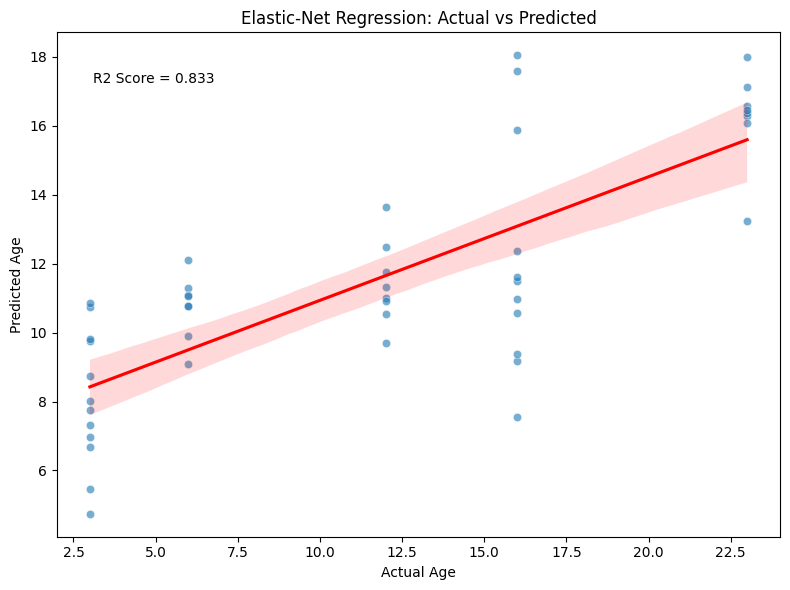

In [32]:
plt.figure(figsize=(8,6))

sns.scatterplot(x=best_true, y=best_preds, alpha=0.6)
sns.regplot(x=best_true, y=best_preds, scatter=False, color="red")

plt.xlabel("Actual Age")
plt.ylabel("Predicted Age")
plt.title(f"{best_model_name}: Actual vs Predicted")

r = np.corrcoef(best_true, best_preds)[0,1]
plt.text(0.05, 0.9, f"R2 Score = {best_row['r2 Score']:.3f}",
         transform=plt.gca().transAxes)

plt.tight_layout()